# Data Science Project: Analisis Data COVID19 di Dunia & ASEAN

<p><b>About :</b> Dengan menyelesaikan module ini, kamu akan mempraktekkan proses pengambilan data melalui Python API Request. Di samping itu kamu akan belajar untuk menggunakan merge dataset menggunakan PANDAS dan membuat visualisasi menggunakan Matplotlib.</p>

<p><b>Course :</b> <a href=https://academy.dqlab.id/main/package/practice/260?pf=0>Data Science Project: Analisis Data COVID19 di Dunia & ASEAN</a></p>

<h2>Module Content:</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#pendahuluan">Pendahuluan</a></li>
        <li><a href="#mengakses-data-covid19">Mengakses Data Covid-19 Dari https://covid19-api.org</a></li>
        <li><a href="#kasus-tertinggi">Kasus Covid-19 di Dunia dan Negara Mana yang Tertinggi</a></li>
        <li><a href="#kasus-covid19-di-asean">Kasus Covid-19 di ASEAN</a></li>
    </ul>
</div>

<h2><a name="pendahuluan"></a>Chapter 1: Pendahuluan</h2>

Covid19 adalah pandemi yang sudah mewabah ke seluruh dunia. Sebagian besar negara-negara di dunia sudah terjangkit. Penanganan tiap-tiap negara pun berbeda, sesuai dengan kebijakan pemerintah. Hal ini mengakibatkan perbedaan trend kenaikan atau penurunan kasus covid berbeda-beda tiap negara.

Pada kasus kali ini, kita akan mencoba menggali data covid19 dari salah satu open api yang tersedia yaitu https://covid19-api.org/.

<h4>Import Library</h4>

In [26]:
import json
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import datetime

<h2><a name="mengakses-data-covid19"></a>Chapter 2: Mengakses Data Covid-19 Dari https://covid19-api.org</h2>

<h4>Membuat Fungsi get API</h4>

Buat fungsi python <code>get_json</code> dengan parameter <code>api_url</code>. fungsi ini akan mengembalikan value berupa python dictionary jika <code>status_code</code> yang dihasilkan adalah 200. Jika tidak, maka value yang dikembalikan adalah <code>None</code>.

In [8]:
def get_json(api_url):
    response = requests.get(api_url)
    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))
    else:
        return response.status_code

<h4>Memanggil API Covid19</h4>

Rekapitulasi data COVID-19 global berada di https://covid19-api.org/. Gunakan parameter <code>record_date</code> untuk mengambil data covid19 di seluruh negara pada tanggal tertentu. Untuk kasus ini, gunakan <code>record_date</code> '2020-08-17', dan masukkan hasil respon api ke variable <code>df_covid_worldwide</code>.

Untuk mendapatkan dataframe covid19, gunakan fungsi <code>pd.json_normalize</code> dan panggil function yang sudah dibuat sebelumnya, yaitu <code>get_json()</code> Print sample data covid dengan menggunakan <code>head()</code> function.

In [9]:
record_date = '2020-08-17'
covid_url = 'https://covid19-api.org/api/status?date='+record_date
df_covid_worldwide = pd.json_normalize(get_json(covid_url))

df_covid_worldwide.head()

TypeError: 'int' object is not iterable

In [10]:
df_covid_worldwide.head()

,country,last_update,cases,deaths,recovered
0,US,2020-08-16T23:27:50,5401167,170019,1833067
1,BR,2020-08-16T23:27:50,3340197,107852,2655017
2,IN,2020-08-16T23:27:50,2589682,49980,1862258
3,RU,2020-08-16T23:27:50,920719,15653,731444
4,ZA,2020-08-16T23:27:50,587345,11839,472377


<h4>Mengubah Format Date</h4>

Ubah format kolom <b>'last_update'</b> menggunakan fungsi <code>to_datetime</code> dengan format <b>YYYY-mm-dd HH:MM:SS</b>. Lalu ubah bentuk datetime ke bentuk date dengan fungsi <code>date()</code> melalui fungsi <code>lambda</code> untuk mengubah setiap row-nya.

In [11]:
df_covid_worldwide['last_update'] = pd.to_datetime(df_covid_worldwide['last_update'], format='%Y-%m-%d %H:%M:%S')
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x: x.date())

<h4>Mengambil Data Countries</h4>

Buatlah dataframe <b>countries</b> dengan memanggil variable <b>countries_url</b> ke api covid19-api.org. Lalu ubah nama kolom alpha2 menjadi country, kemudian ambil hanya kolom name dan country saja untuk dataframe countries (df_countries) ini.

In [16]:
countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.json_normalize(get_json(countries_url))
df_countries = df_countries.rename(columns={'alpha2': 'country'})[['name','country']]

df_countries.head()

,name,country
0,Afghanistan,AF
1,Albania,AL
2,Algeria,DZ
3,Andorra,AD
4,Angola,AO


<h2><a name="kasus-tertinggi"></a>Chapter 3: Kasus Covid-19 di Dunia dan Negara Mana yang Tertinggi</h2>

<h4>Merge Covid19 Data dan Countries</h4>

Selanjutnya adalah mapping data covid19 dan data country. Gunakan fungsi <code>merge</code> pada pandas untuk menggabungkan <code>df_covid_worldwide</code> dan <code>df_countries</code>. Untuk merge, gunakan kolom country. Lalu print sample data dengan menggunakan <code>head()</code>.

In [18]:
df_covid_denormalized = pd.merge(df_covid_worldwide, df_countries, on='country')

df_covid_denormalized.head()

,country,last_update,cases,deaths,recovered,name
0,US,2020-08-16,5401167,170019,1833067,United States of America
1,BR,2020-08-16,3340197,107852,2655017,Brazil
2,IN,2020-08-16,2589682,49980,1862258,India
3,RU,2020-08-16,920719,15653,731444,Russian Federation
4,ZA,2020-08-16,587345,11839,472377,South Africa


<h4>Menghitung Fatality Ratio</h4>

Tambahkan satu kolom tambahan yaitu <b>fatality_ratio</b>, yang merupakan pembagian antara kolom deaths dan cases.

In [19]:
df_covid_denormalized['fatality_ratio'] = df_covid_denormalized['deaths']/df_covid_denormalized['cases']

<h4>Negara-negara dengan Fatality Ratio Tertinggi</h4>

Ambil top 20 negara dengan value kolom <b>fatality_ratio</b> tertinggi dengan menggunakan fungsi <code>sort_values</code>.

In [20]:
df_top_20_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio', ascending=False).head(20)

<h4>Visualisasi Negara dengan Fatality Ratio Tertinggi</h4>

Untuk memvisualisasikan negara-negara dengan kasus fatality rate tertinggi akibat covid-19 ini dapat dilakukan dengan menggunakan bar chart.  Di sini tentukan terlebih dahulu isi dari variable x axis dan y axis.

Variabel <b>x</b> axis adalah kolom name, dan kolom <b>y</b> atau value nya adalah kolom <b>fatality_ratio</b> dan gunakan fungsi <code>plt.bar([value x axis, value y axis])</code>.

Label sumbu x diputar 90 derajat untuk menghindari bertumpuknya nama-nama negara pada posisi 0 derajat.

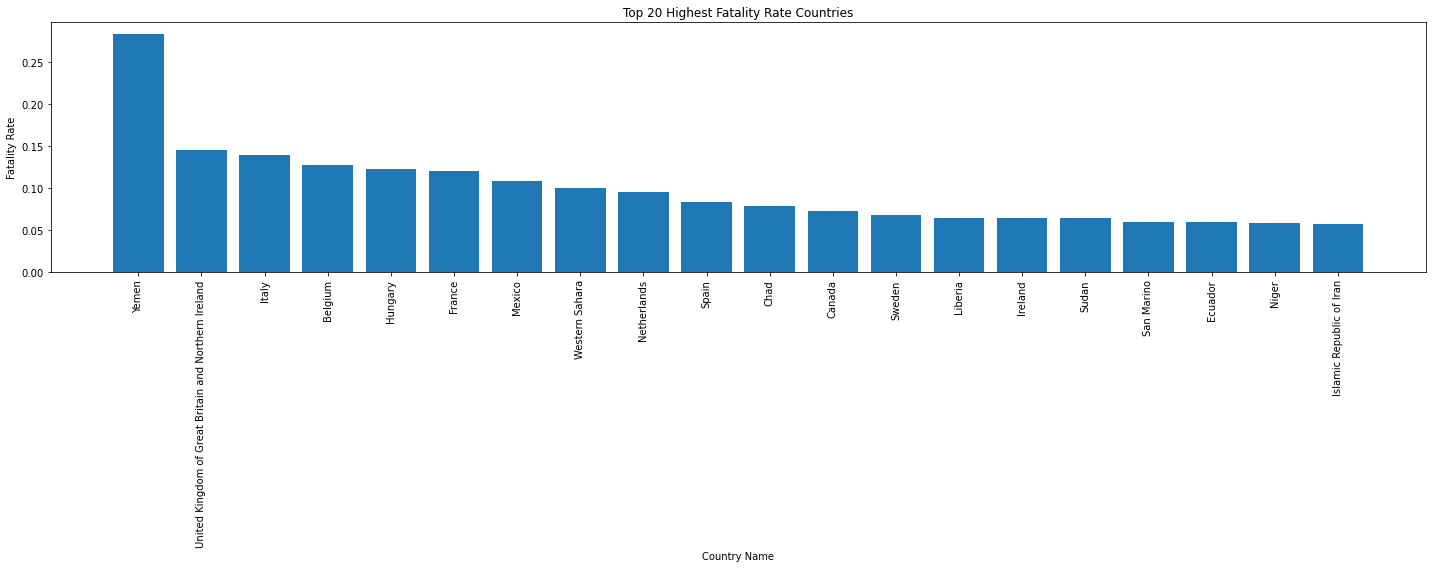

In [21]:
plt.figure(figsize=(20, 8))
x = df_top_20_fatality_rate['name']
y = df_top_20_fatality_rate['fatality_ratio']
plt.bar(x,y)
plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 20 Highest Fatality Rate Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<h2><a name="kasus-covid19-di-asean"></a>Chapter 4: Kasus Covid-19 di ASEAN</h2>

<h4>Menggabungkan Dataframe</h4>

Selanjutnya adalah membandingkan kasus covid19 di Indonesia (ID) dengan negara-negara tetangga, yaitu:
<ul>
    <li>MY -> Malaysia,</li>
    <li>SG -> Singapure,</li>
    <li>TH -> Thailand,</li>
    <li>VN -> Vietnam.</li>
</ul>
Untuk itu, api country dipanggil berkali-kali sebanyak negara yang akan kita bandingkan.

Gunakan fungsi <code>pd.json_normalize</code> dan panggil function yang sudah dibuat sebelumnya, yaitu <code>get_json()</code>.

Gunakan fungsi <code>datetime</code> untuk merubah string ke bentuk datetime (YYYY-mm-dd HH:MM:SS) yang selanjutnya diubah ke format date.

In [25]:
countries = ['ID','MY','SG','TH','VN']
i = 0
for country in countries:
    covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
    df_covid_timeline = pd.json_normalize(get_json(covid_timeline_url))
    df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%d %H:%M:%S')
    df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
    if i==0:
        df_covid_timeline_merged = df_covid_timeline
    else:
        df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
        i=i+1
    
df_covid_timeline_merged.head()

,country,last_update,cases,deaths,recovered
0,VN,2021-03-05,2494,35,1920
1,VN,2021-03-04,2488,35,1920
2,VN,2021-03-03,2482,35,1898
3,VN,2021-03-02,2472,35,1898
4,VN,2021-03-01,2448,35,1876


<h4>Merge Data Covid19 Dengan Data Country</h4>

Lalu gabungkan <code>df_covid_timeline_merged</code> dengan <code>df_countries</code> dengan kolom <b>country</b> sebagai pivot.

In [27]:
df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged, df_countries, on='country')

<h4>Kasus Covid-19 di ASEAN pada Bulan Maret 2020</h4>

Filter kolom <b>last_update</b> dari data covid19 sehingga hanya data dari tanggal 1 Maret 2020 ke atas yangdiambil. Format <code>datetime.date</code> menggunakan format YYYY, mm, dd.

In [28]:
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] 
                                                                 >= datetime.date(2020, 3, 1))]

<h4>Visualisasi Kasus Covid-19 di ASEAN</h4>

Buat variable x dan y dimana x adalah tanggal (<b>last_update</b>) pada tiap-tiap negara dan y adalah jumlah kasus (<b>cases</b>) pada tiap-tiap negara. Lalu plot x dan y untuk menggambar line chart.

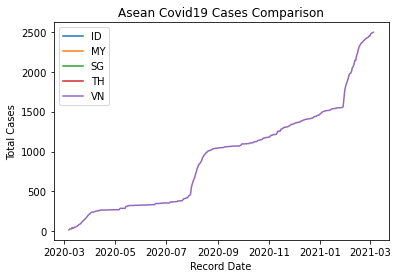

In [29]:
plt.clf()
countries = ['ID','MY','SG','TH','VN']
for country in countries:
    country_data = df_covid_timeline_denormalized['country']==country
    x = df_covid_timeline_denormalized[country_data]['last_update']
    y = df_covid_timeline_denormalized[country_data]['cases']
    plt.plot(x, y, label = country)

plt.legend()
plt.xlabel('Record Date')
plt.ylabel('Total Cases')
plt.title('Asean Covid19 Cases Comparison')
plt.show()